#Project 1
##Author: Nikoloz Eubidze
##Data: Student Admission Records
####About Dataset:
This dataset is crafted for beginners to practice data cleaning and preprocessing techniques in machine learning. It contains 157 rows of student admission records, including duplicate rows, missing values, and some data inconsistencies (e.g., outliers, unrealistic values). It’s ideal for practicing common data preparation steps before applying machine learning algorithms.

The dataset simulates a university admission record system, where each student’s admission profile includes test scores, high school percentages, and admission status. The data contains realistic flaws often encountered in raw data, offering hands-on experience in data wrangling.<br><br>

**The dataset contains the following columns**:<br>

**Name**: Student's first name (Pakistani names). <br>
**Age**: Age of the student (some outliers and missing values). <br>
**Gender**: Gender (Male/Female).<br>
**Admission Test Score**: Score obtained in the admission test (includes outliers and missing values).<br>
**High School Percentage**: Student's high school final score percentage (includes outliers and missing values).<br>
**City**: City of residence in Pakistan.<br>
**Admission Status**: Whether the student was accepted or rejected.<br>

Source: https://www.kaggle.com/datasets/zeeshier/student-admission-records

In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("zeeshier/student-admission-records")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/student-admission-records


In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
from sklearn.preprocessing import StandardScaler, MinMaxScaler, PowerTransformer
import os
import scipy.stats as stats
warnings.filterwarnings('ignore')
%matplotlib inline

###**Loading the dataset**

In [ ]:
filename = next((os.path.join(path, f) for f in os.listdir(path) if f.endswith('.csv')), None)

# Load the dataset into a DataFrame
df = pd.read_csv(filename)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 157 entries, 0 to 156
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Name                    147 non-null    object 
 1   Age                     147 non-null    float64
 2   Gender                  147 non-null    object 
 3   Admission Test Score    146 non-null    float64
 4   High School Percentage  146 non-null    float64
 5   City                    147 non-null    object 
 6   Admission Status        147 non-null    object 
dtypes: float64(3), object(4)
memory usage: 8.7+ KB


##**Info**
Based on the datatypes, we can see that we have float64 and object type variables. This means that we have a lot of categorical data, which can help us determine important issues and correlations between the numerical and categorical data.<br>
There are 157 entries containting the name, age, gender, admission test score, high school percentage, city and admission status of each student.


In [ ]:
df.head()

,Name,Age,Gender,Admission Test Score,High School Percentage,City,Admission Status
0,Shehroz,24.0,Female,50.0,68.90,Quetta,Rejected
1,Waqar,21.0,Female,99.0,60.73,Karachi,NaN
2,Bushra,17.0,Male,89.0,NaN,Islamabad,Accepted
3,Aliya,17.0,Male,55.0,85.29,Karachi,Rejected
4,Bilal,20.0,Male,65.0,61.13,Lahore,NaN


In [ ]:
df.describe(include='all')

,Name,Age,Gender,Admission Test Score,High School Percentage,City,Admission Status
count,147,147.000000,147,146.000000,146.000000,147,147
unique,64,NaN,2,NaN,NaN,7,2
top,Shehroz,NaN,Female,NaN,NaN,Quetta,Rejected
freq,6,NaN,83,NaN,NaN,30,76
mean,NaN,19.680272,NaN,77.657534,75.684726,NaN,NaN
std,NaN,4.540512,NaN,16.855343,17.368014,NaN,NaN
min,NaN,-1.000000,NaN,-5.000000,-10.000000,NaN,NaN
25%,NaN,18.000000,NaN,68.250000,65.052500,NaN,NaN
50%,NaN,20.000000,NaN,79.000000,77.545000,NaN,NaN
75%,NaN,22.000000,NaN,89.000000,88.312500,NaN,NaN


##**Observations**
Right off the bat there are issues with the data... There are 147 students and they are missing abundce of information, categorical and numerical.<br><br>
**Name**: there are 64 unique names but 147 students, yes there are duplicates since many can share the same name so the only issue we can solve here if any of the rows repeat the same information we can drop them for more clean data.<br><br>
**Age**: The issue here lies in the minimum age, which is -1. Meaning that the Age outliers or incorrect entries must be cleaned by having the age range between 0 and 100.<br><br>
**Gender**: There are two genders participating, Male and Female, this could give us some interesting insights. The number of females are greater than the males, 84 female and 64 males, this could be useful on finding the differences on performace between the two genders.<br><br>
**Admission Test Score**: Since the score range must be in the range of 0-100, the minimal score cannot be -5. This suggests that there are issues within the grading. Additionally we can see that most students mostly fall between 68 and 89 mark range<br><br>
**High School Percentage**: The same issue as the previously mentioned, the minimal score is -10, when the score range must be in the range from 0-100.<br><br>
**City**: There are 7 unique cities and the most common is Quetta with 30 sudents. This could be useful for city based analysis of the students.<br><br>
**Admission Status**: There are two categories, accepted and rejected, the data shows that there are 76 rejected students.<br><br>


##**Questions**

*   How does the High School Percentage and Admission Test Score affect students Admission Status?

*   Which age group has a higher acceptance rate based on their admissions score and high school percentage?

*   Which gender group is the most likely to get accepted?

*   Does the city affect the acceptance rate?


In [ ]:
df.isnull().sum() # missing values in each column

,0
Name,10
Age,10
Gender,10
Admission Test Score,11
High School Percentage,11
City,10
Admission Status,10


In [ ]:
df[df.isnull().any(axis=1)] # shows the rows that have the missing values

,Name,Age,Gender,Admission Test Score,High School Percentage,City,Admission Status
1,Waqar,21.0,Female,99.0,60.73,Karachi,NaN
2,Bushra,17.0,Male,89.0,NaN,Islamabad,Accepted
4,Bilal,20.0,Male,65.0,61.13,Lahore,NaN
5,Murtaza,23.0,Female,NaN,NaN,Islamabad,Accepted
6,Asad,18.0,Male,NaN,97.31,Multan,Accepted
8,Rohail,17.0,Male,64.0,NaN,Karachi,Accepted
11,Nashit,18.0,Male,89.0,NaN,Lahore,Accepted
12,NaN,19.0,Male,66.0,88.17,NaN,NaN
16,Mahnoor,NaN,Male,61.0,74.08,Islamabad,Rejected
19,NaN,19.0,Male,84.0,NaN,Islamabad,Rejected


In [ ]:
duplicates = df[df.duplicated()]
duplicates


,Name,Age,Gender,Admission Test Score,High School Percentage,City,Admission Status
22,Kamran,18.0,Male,53.0,98.98,Multan,Rejected
52,Ahmed,21.0,Male,62.0,79.03,Karachi,Accepted
88,Aliya,17.0,Male,55.0,85.29,Karachi,Rejected
110,Hamza,22.0,Male,99.0,86.58,Multan,Accepted
120,Ayesha,24.0,Male,94.0,98.43,Multan,Rejected
122,Tuba,17.0,Female,75.0,78.43,Peshawar,Accepted


##**Cleaning the data based on the previous observations**


In [ ]:
df = df.drop_duplicates(duplicates).reset_index(drop=True)

df

,Name,Age,Gender,Admission Test Score,High School Percentage,City,Admission Status
0,Shehroz,24.0,Female,50.0,68.90,Quetta,Rejected
1,Waqar,21.0,Female,99.0,60.73,Karachi,NaN
2,Bushra,17.0,Male,89.0,NaN,Islamabad,Accepted
3,Aliya,17.0,Male,55.0,85.29,Karachi,Rejected
4,Bilal,20.0,Male,65.0,61.13,Lahore,NaN
...,...,...,...,...,...,...,...
146,Ali,19.0,Female,85.0,78.09,Quetta,Accepted
147,Bilal,17.0,Female,81.0,84.40,Islamabad,Rejected
148,Fatima,21.0,Female,98.0,50.86,Multan,Accepted
149,Shoaib,-1.0,Male,91.0,80.12,Quetta,Accepted


In [ ]:
df = df.dropna(subset=['Admission Status']).reset_index(drop=True)
df

,Name,Age,Gender,Admission Test Score,High School Percentage,City,Admission Status
0,Shehroz,24.0,Female,50.0,68.90,Quetta,Rejected
1,Bushra,17.0,Male,89.0,NaN,Islamabad,Accepted
2,Aliya,17.0,Male,55.0,85.29,Karachi,Rejected
3,Murtaza,23.0,Female,NaN,NaN,Islamabad,Accepted
4,Asad,18.0,Male,NaN,97.31,Multan,Accepted
...,...,...,...,...,...,...,...
136,Ali,19.0,Female,85.0,78.09,Quetta,Accepted
137,Bilal,17.0,Female,81.0,84.40,Islamabad,Rejected
138,Fatima,21.0,Female,98.0,50.86,Multan,Accepted
139,Shoaib,-1.0,Male,91.0,80.12,Quetta,Accepted


##**Cleaing invalid values in both Admission Test Score and High School Percentage**
BoxPlot is used to identify the outliers, people who scored less than 0 or more than 100

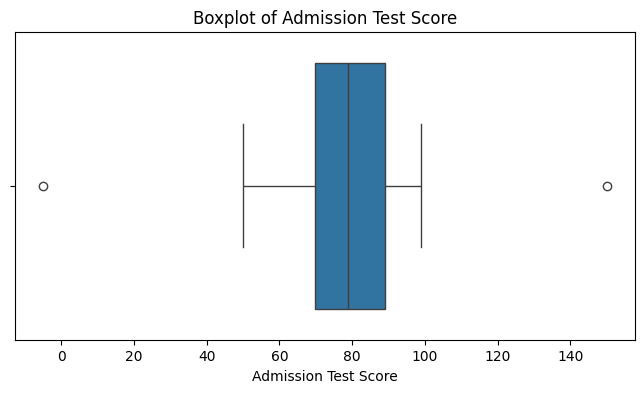

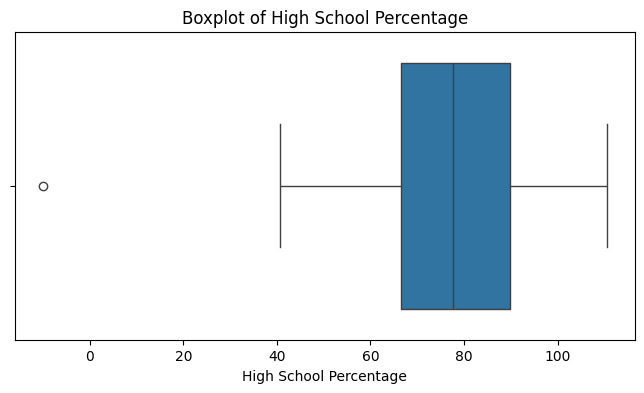

In [ ]:
# Boxplot for Admission Test Score
plt.figure(figsize=(8, 4))
sns.boxplot(x=df['Admission Test Score'])
plt.title('Boxplot of Admission Test Score')
plt.xlabel('Admission Test Score')
plt.show()

# Boxplot for High School Percentage
plt.figure(figsize=(8, 4))
sns.boxplot(x=df['High School Percentage'])
plt.title('Boxplot of High School Percentage')
plt.xlabel('High School Percentage')
plt.show()


In [ ]:
# Group data by Admission Status and inspect summary statistics
df.groupby('Admission Status')[['Admission Test Score', 'High School Percentage']].describe()


Admission Test Score                                          \
                                count       mean        std   min   25%   50%   
Admission Status                                                                
Accepted                         63.0  78.047619  13.994732  50.0  71.0  81.0   
Rejected                         69.0  77.202899  19.293080  -5.0  68.0  78.0   

                              High School Percentage                        \
                   75%    max                  count       mean        std   
Admission Status                                                             
Accepted          89.0   99.0                   63.0  77.615079  13.928322   
Rejected          89.0  150.0                   67.0  74.850896  18.569275   

                                                       
                    min     25%    50%     75%    max  
Admission Status                                       
Accepted          50.86  67.255  78.57  89.555  110.5  
Rejected         -10.00  64.300  74.13  89.750   99.8

In [ ]:
invalid_rows = df[(df['Admission Test Score'] < 0) | (df['High School Percentage'] < 0)]
print("Rows with a negative value in either column:")
invalid_rows




Rows with a negative value in either column:


,Name,Age,Gender,Admission Test Score,High School Percentage,City,Admission Status
8,Shafiq,17.0,Male,78.0,-10.00,Quetta,Rejected
26,Rehan,19.0,Female,-5.0,61.91,Quetta,Rejected


In [ ]:
# Keep only rows where both values are 0 or more
df = df[(df['Admission Test Score'] >= 0) & (df['High School Percentage'] >= 0)]
# Keep only rows where both values are 100 or less
df = df[(df['High School Percentage'] <= 100) & (df['Admission Test Score'] <= 100)]

df

,Name,Age,Gender,Admission Test Score,High School Percentage,City,Admission Status
0,Shehroz,24.0,Female,50.0,68.90,Quetta,Rejected
2,Aliya,17.0,Male,55.0,85.29,Karachi,Rejected
5,Rabia,20.0,Female,82.0,55.67,Lahore,Accepted
7,Kamran,18.0,Male,53.0,98.98,Multan,Rejected
10,Ahmed,21.0,Male,62.0,79.03,Karachi,Accepted
...,...,...,...,...,...,...,...
136,Ali,19.0,Female,85.0,78.09,Quetta,Accepted
137,Bilal,17.0,Female,81.0,84.40,Islamabad,Rejected
138,Fatima,21.0,Female,98.0,50.86,Multan,Accepted
139,Shoaib,-1.0,Male,91.0,80.12,Quetta,Accepted


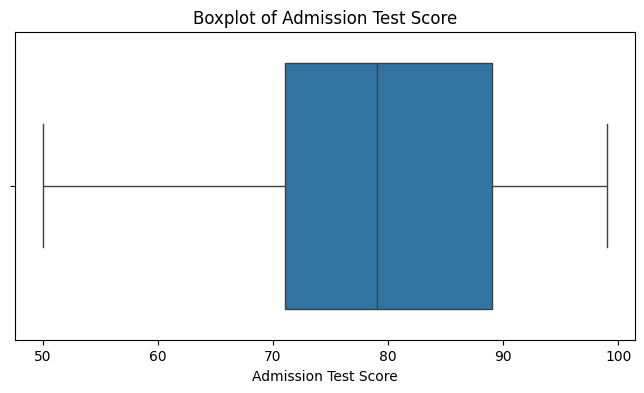

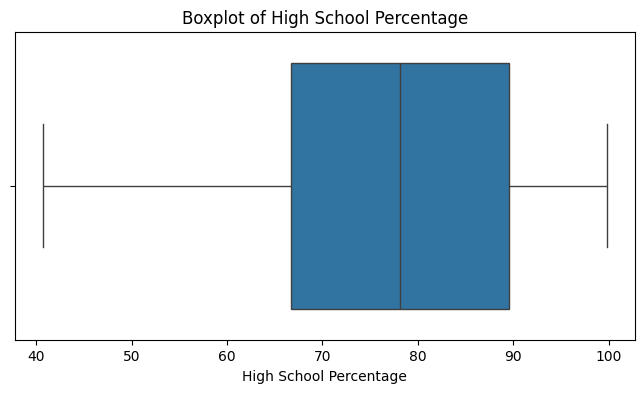

In [ ]:
# Boxplot for Admission Test Score
plt.figure(figsize=(8, 4))
sns.boxplot(x=df['Admission Test Score'])
plt.title('Boxplot of Admission Test Score')
plt.xlabel('Admission Test Score')
plt.show()

# Boxplot for High School Percentage
plt.figure(figsize=(8, 4))
sns.boxplot(x=df['High School Percentage'])
plt.title('Boxplot of High School Percentage')
plt.xlabel('High School Percentage')
plt.show()

##**Imputng invalid values in Age column**
The BoxPlot is used to identify the outliers, people that are outside the normal range.

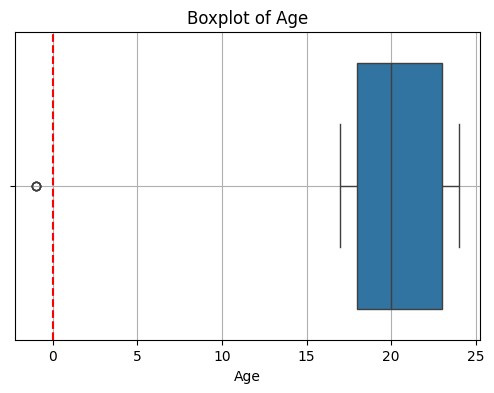

In [ ]:

fig, ax = plt.subplots(figsize=(6, 4))


sns.boxplot(x=df['Age'], ax=ax)


ax.axvline(x=0, color='red', linestyle='--')
ax.set_title('Boxplot of Age')
ax.set_xlabel('Age')
ax.grid(True)

plt.show()


In [ ]:
negative_age_rows = df[df['Age'] < 0]
negative_age_rows


,Name,Age,Gender,Admission Test Score,High School Percentage,City,Admission Status
44,Shehroz,-1.0,Female,61.0,69.48,Quetta,Rejected
77,NaN,-1.0,Male,66.0,79.07,Rawalpindi,Rejected
100,Zunaira,-1.0,Female,84.0,58.77,Quetta,Rejected
139,Shoaib,-1.0,Male,91.0,80.12,Quetta,Accepted


In [ ]:
# Calculate median age from the valid entries (age >= 0)
median_age = df.loc[df['Age'] >= 0, 'Age'].median()

# Replace negative ages with the median age
df.loc[df['Age'] < 0, 'Age'] = median_age
df['Age'].fillna(median_age, inplace=True)

df


,Name,Age,Gender,Admission Test Score,High School Percentage,City,Admission Status
0,Shehroz,24.0,Female,50.0,68.90,Quetta,Rejected
2,Aliya,17.0,Male,55.0,85.29,Karachi,Rejected
5,Rabia,20.0,Female,82.0,55.67,Lahore,Accepted
7,Kamran,18.0,Male,53.0,98.98,Multan,Rejected
10,Ahmed,21.0,Male,62.0,79.03,Karachi,Accepted
...,...,...,...,...,...,...,...
136,Ali,19.0,Female,85.0,78.09,Quetta,Accepted
137,Bilal,17.0,Female,81.0,84.40,Islamabad,Rejected
138,Fatima,21.0,Female,98.0,50.86,Multan,Accepted
139,Shoaib,20.0,Male,91.0,80.12,Quetta,Accepted


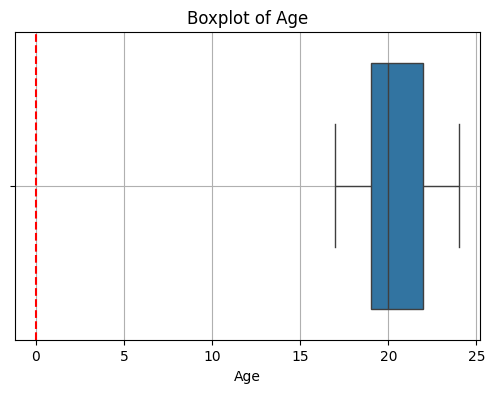

In [ ]:
fig, ax = plt.subplots(figsize=(6, 4))


sns.boxplot(x=df['Age'], ax=ax)


ax.axvline(x=0, color='red', linestyle='--')
ax.set_title('Boxplot of Age')
ax.set_xlabel('Age')
ax.grid(True)

plt.show()

##**Imputing gender column**
The reason for the imputation is that 9 out of the 119 students left after cleaning data have vital information that is neccessary to answer the questions.
Effective method would be to replace the NaN's with the most common value, since most are repeated.

In [ ]:
print(df[['Gender', 'City']].isnull().sum())


Gender    9
City      5
dtype: int64


In [ ]:
# Impute missing values using the mode (most common value)
df['Gender'].fillna(df['Gender'].mode()[0], inplace=True)
df['City'].fillna(df['City'].mode()[0], inplace=True)

df


,Name,Age,Gender,Admission Test Score,High School Percentage,City,Admission Status
0,Shehroz,24.0,Female,50.0,68.90,Quetta,Rejected
2,Aliya,17.0,Male,55.0,85.29,Karachi,Rejected
5,Rabia,20.0,Female,82.0,55.67,Lahore,Accepted
7,Kamran,18.0,Male,53.0,98.98,Multan,Rejected
10,Ahmed,21.0,Male,62.0,79.03,Karachi,Accepted
...,...,...,...,...,...,...,...
136,Ali,19.0,Female,85.0,78.09,Quetta,Accepted
137,Bilal,17.0,Female,81.0,84.40,Islamabad,Rejected
138,Fatima,21.0,Female,98.0,50.86,Multan,Accepted
139,Shoaib,20.0,Male,91.0,80.12,Quetta,Accepted


In [ ]:
df.describe(include='all')

,Name,Age,Gender,Admission Test Score,High School Percentage,City,Admission Status
count,112,119.000000,119,119.000000,119.000000,119,119
unique,60,NaN,2,NaN,NaN,7,2
top,Shehroz,NaN,Female,NaN,NaN,Quetta,Rejected
freq,5,NaN,76,NaN,NaN,30,61
mean,NaN,20.462185,NaN,78.033613,76.547731,NaN,NaN
std,NaN,2.284027,NaN,13.880808,14.524464,NaN,NaN
min,NaN,17.000000,NaN,50.000000,40.700000,NaN,NaN
25%,NaN,19.000000,NaN,71.000000,66.670000,NaN,NaN
50%,NaN,20.000000,NaN,79.000000,78.090000,NaN,NaN
75%,NaN,22.000000,NaN,89.000000,89.555000,NaN,NaN


##**Now the data looks clean!**

##**Data Transformation (Normalization, Standardization, Scaling)**
First lets see how skewed the data is

In [ ]:
# Calculate skewness for a numerical column Admission Test Score
skewness = df['Admission Test Score'].skew()
print("Skewness:", skewness)


Skewness: -0.44104395914170474


In [ ]:
# Calculate skewness for a numerical column High School Percentage
skewness = df['High School Percentage'].skew()
print("Skewness:", skewness)

Skewness: -0.21370800648435315


In [ ]:
# Calculate skewness for a numerical column Age
skewness = df['Age'].skew()
print("Skewness:", skewness)

Skewness: 0.017156124937140818


This tells us that the data is more-or-so symmetrically skewed, now we can apply the Data Transformations below.

##**Normalization**

In [ ]:
# Check if all values are > 0; if not, shift the data accordingly
if (df['Admission Test Score'] <= 0).any():
    # For example, shift the data by adding 1 (adjust if necessary)
    admission_scores_pos = df['Admission Test Score'] + 1
else:
    admission_scores_pos = df['Admission Test Score']

# Apply Box-Cox transformation
df['Admission Test Score_boxcox'], lambda_val = stats.boxcox(admission_scores_pos)
print("Box-Cox Lambda:", lambda_val)

# Repeat for High School Percentage if needed (shift if necessary)
if (df['High School Percentage'] <= 0).any():
    hs_percentage_pos = df['High School Percentage'] + 1
else:
    hs_percentage_pos = df['High School Percentage']

df['High School Percentage_boxcox'], lambda_hs = stats.boxcox(hs_percentage_pos)
print("Box-Cox Lambda (High School Percentage):", lambda_hs)


Box-Cox Lambda: 2.0131954741529907
Box-Cox Lambda (High School Percentage): 1.39205852583463


**Purpose**:<br>
Box-Cox normalization is used to transform skewed numerical data into a shape that is closer to a normal distribution. This is especially useful when the data contains outliers or when statistical methods assume normality.

**Applied to**: Admission Test Score, High School Percentage and Age

**Note**:
Since Box-Cox requires strictly positive values, a small constant was added to any column containing zero or negative values before transformation.

##**Standardization**

In [ ]:
# Instantiate the StandardScaler
scaler = StandardScaler()

# Standardize "Admission Test Score"
df['Admission Test Score_std'] = scaler.fit_transform(df[['Admission Test Score']])

# Standardize "High School Percentage"
df['High School Percentage_std'] = scaler.fit_transform(df[['High School Percentage']])

# Optionally, you can standardize the Box-Cox transformed columns too if needed:
df['Admission Test Score_boxcox_std'] = scaler.fit_transform(df[['Admission Test Score_boxcox']])
df['High School Percentage_boxcox_std'] = scaler.fit_transform(df[['High School Percentage_boxcox']])

**Purpose**:<br>
Standardization transforms features to have a mean of 0 and standard deviation of 1. This is essential for machine learning models that are sensitive to feature scaling.

Formula:
z= x−μ / σ <br><br>
Applied to: Admission Test Score, High School Percentage and Age

##**Scaling**

In [ ]:
# Instantiate the MinMaxScaler
minmax_scaler = MinMaxScaler(feature_range=(0, 1))

# Scale "Admission Test Score"
df['Admission Test Score_mm'] = minmax_scaler.fit_transform(df[['Admission Test Score']])

# Scale "High School Percentage"
df['High School Percentage_mm'] = minmax_scaler.fit_transform(df[['High School Percentage']])

# Optionally, scale the Box-Cox transformed data:
df['Admission Test Score_boxcox_mm'] = minmax_scaler.fit_transform(df[['Admission Test Score_boxcox']])
df['High School Percentage_boxcox_mm'] = minmax_scaler.fit_transform(df[['High School Percentage_boxcox']])

**Purpose**:<br>
Min-Max Scaling rescales features to a fixed range, typically [0, 1]. This is especially important for algorithms based on distance or gradient optimization.

Formula: 𝑥_scaled=𝑥 − min(𝑥) / (max(𝑥) − min(𝑥))

Applied to: Admission Test Score, High School Percentage and Age

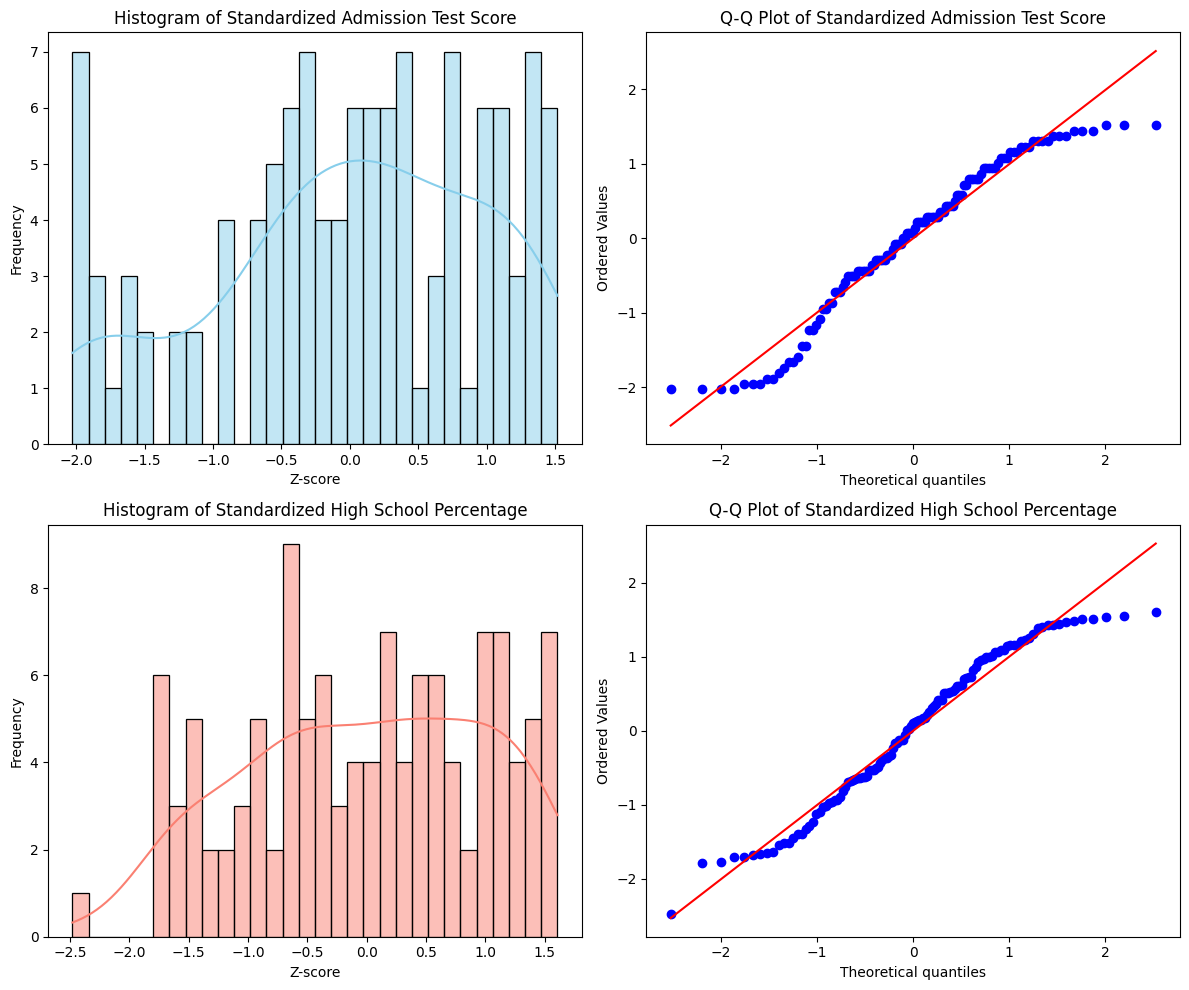

In [295]:
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# --------- Admission Test Score ---------
# Histogram + KDE
sns.histplot(df['Admission Test Score_std'], kde=True, bins=30, ax=axes[0, 0], color='skyblue')
axes[0, 0].set_title('Histogram of Standardized Admission Test Score')
axes[0, 0].set_xlabel('Z-score')
axes[0, 0].set_ylabel('Frequency')

# Q-Q Plot
stats.probplot(df['Admission Test Score_std'], dist="norm", plot=axes[0, 1])
axes[0, 1].set_title('Q-Q Plot of Standardized Admission Test Score')

# --------- High School Percentage ---------
# Histogram + KDE
sns.histplot(df['High School Percentage_std'], kde=True, bins=30, ax=axes[1, 0], color='salmon')
axes[1, 0].set_title('Histogram of Standardized High School Percentage')
axes[1, 0].set_xlabel('Z-score')
axes[1, 0].set_ylabel('Frequency')

# Q-Q Plot
stats.probplot(df['High School Percentage_std'], dist="norm", plot=axes[1, 1])
axes[1, 1].set_title('Q-Q Plot of Standardized High School Percentage')

plt.tight_layout()
plt.show()

##The data is roughly normally distributed.

##**Answering the questions**
Inorder to answer any question a Correlation Matrix must be shown to find the dependencies of data to eachother.

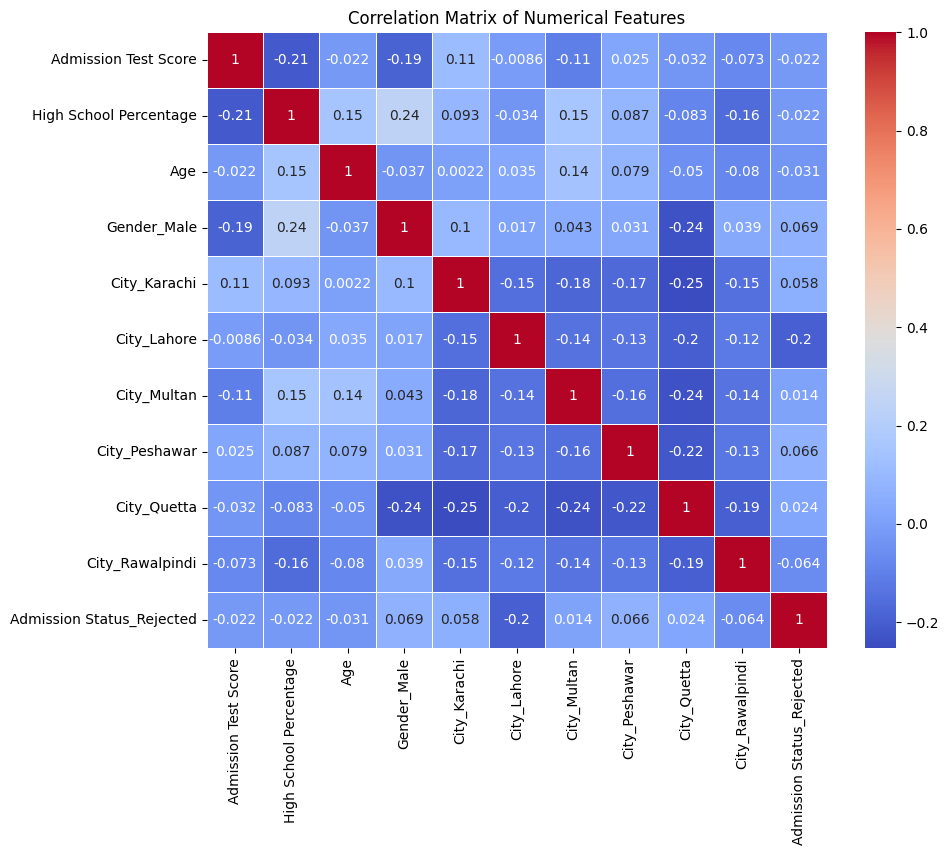

In [ ]:
# Select your columns
selected_cols = ['Admission Test Score', 'High School Percentage', 'Age', 'Gender', 'City', 'Admission Status']

# Create a new DataFrame with selected columns
df_selected = df[selected_cols]

# One-hot encode categorical columns (drop_first=True to avoid multicollinearity)
df_encoded = pd.get_dummies(df_selected, drop_first=True)


corr_matrix = df_encoded.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix of Numerical Features')
plt.show()





##**Correlation Matrix of Numerical Features**
This matrix shows the Pearson correlation coefficients between numerical variables and one-hot encoded categorical features (e.g., Gender_Male, City_Lahore) including the binary target variable Admission Status_Rejected.<br>

**Key Interpretations**<br>
Target Variable: Admission Status_Rejected<br>
Admission Test Score: -0.022<br>
Very weak negative correlation. Higher test scores slightly decrease the chance of rejection.

High School Percentage: -0.022<br>
Also a very weak negative correlation. Higher high school percentages are slightly associated with acceptance.

Age: -0.031<br>
Negligible negative correlation. Age is not significantly related to admission status.

Gender_Male: 0.069<br>
Slight positive correlation. Male students are marginally more likely to be rejected than female students.

City-Based Insights<br>
City_Lahore: -0.20<br>
Moderate negative correlation. Students from Lahore are less likely to be rejected.

City_Karachi, City_Quetta, City_Peshawar: Slight positive correlations
Students from these cities have slightly higher rejection rates.

Feature Relationships (Highlights)<br>
Admission Test Score and High School Percentage: -0.21<br>
Slight inverse relationship. Students with higher scores tend to have lower high school percentages and vice versa.

High School Percentage and Gender_Male: 0.24<br>
Male students tend to have slightly higher high school percentages on average.

##**Questions**
##Q1.How does the High School Percentage and Admission Test Score affect students Admission Status?

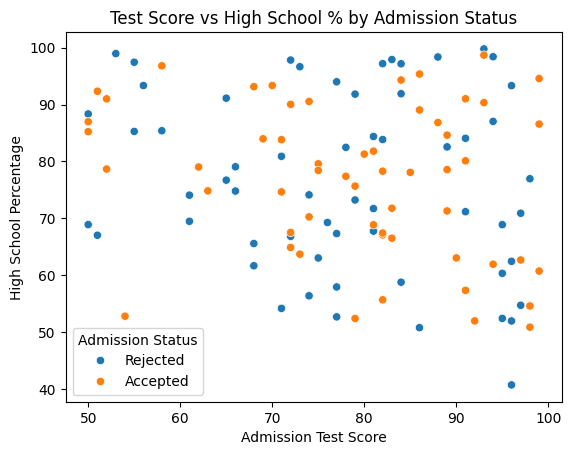

In [ ]:
sns.scatterplot(x='Admission Test Score',
                y='High School Percentage',
                hue='Admission Status',
                data=df)
plt.title('Test Score vs High School % by Admission Status')
plt.xlabel('Admission Test Score')
plt.ylabel('High School Percentage')
plt.show()


##**Interpretation**:
This plot shows how students' test scores and high school percentages relate to their admission status. Accepted students (orange) tend to be scattered toward higher values on both axes, while rejected students (blue) are spread across all ranges. **This indicates that higher scores and percentages slightly improve admission chances**, but they are not definitive predictors. Some students with high scores or percentages were still rejected, suggesting that other factors (such as city or missing data) also influence decisions.

##Q2.Which age group has a higher acceptance rate based on their admissions score and high school percentage?

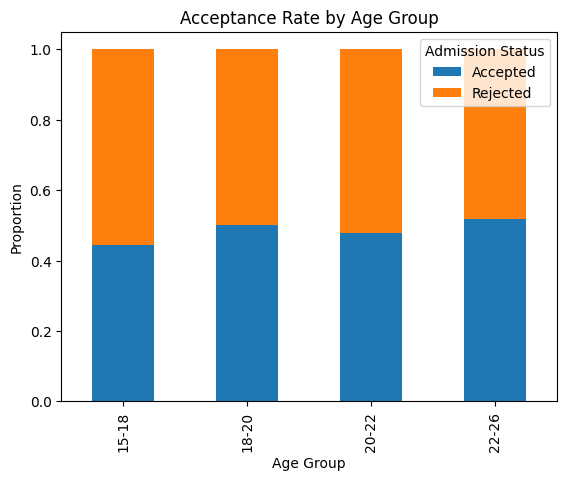

In [ ]:
# age groups
df['Age Group'] = pd.cut(df['Age'], bins=[14, 18, 20, 22, 26], labels=['15-18', '18-20', '20-22', '22-26'])

# Normalize admission counts by group
age_admission = df.groupby('Age Group')['Admission Status'].value_counts(normalize=True).unstack()

age_admission.plot(kind='bar', stacked=True)
plt.title('Acceptance Rate by Age Group')
plt.ylabel('Proportion')
plt.xlabel('Age Group')
plt.legend(title='Admission Status')
plt.show()


##**Interpretation**:<br>
This plot shows the proportion of accepted and rejected students within each age group. The acceptance rate is fairly consistent across groups, with **slightly higher acceptance observed in the 22–26 age group**. There is no strong age bias, **but older students appear marginally more likely to be accepted**.

##Q3.Which gender group is the most likely to get accepted?

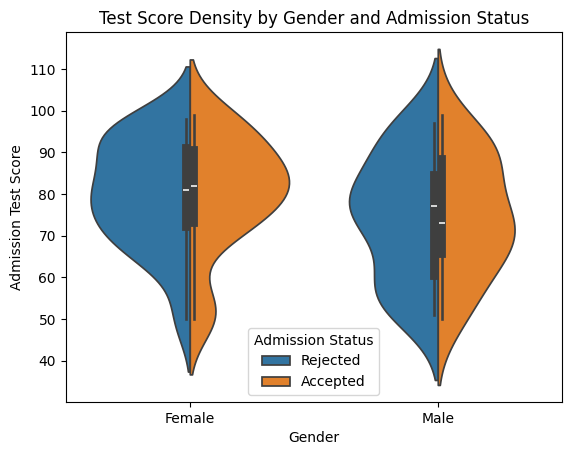

In [ ]:
sns.violinplot(x='Gender', y='Admission Test Score', hue='Admission Status', data=df, split=True)
plt.title('Test Score Density by Gender and Admission Status')
plt.show()




##**Interpretation**:
This violin plot displays the distribution and density of test scores for males and females, separated by acceptance or rejection. For both genders, accepted students tend to have higher test scores than rejected ones. Additionally, **female accepted students show slightly higher median scores than their male counterparts**. **This supports the idea that test scores are a factor in admission, but not the only one**. The similarity in shape between male and female distributions suggests no major gender disparity in how scores affect admissions.

##Q4.Does the city affect the acceptance rate?

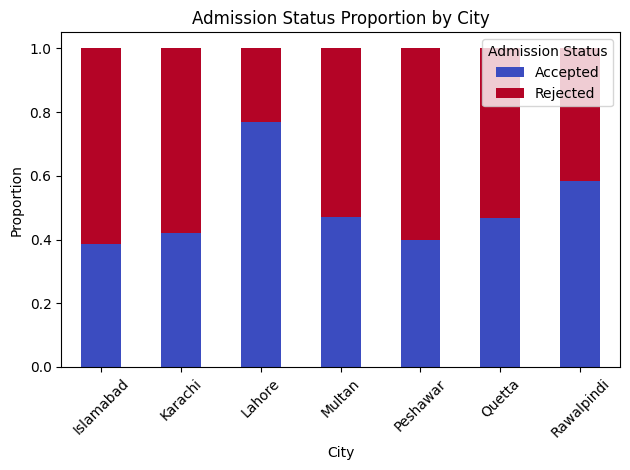

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Calculate proportions of Admission Status within each City
city_admission = df.groupby('City')['Admission Status'].value_counts(normalize=True).unstack()

# Plot as a stacked bar chart
city_admission.plot(kind='bar', stacked=True, colormap='coolwarm')
plt.title('Admission Status Proportion by City')
plt.xlabel('City')
plt.ylabel('Proportion')
plt.legend(title='Admission Status')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


##**Interpretation**:
This plot compares admission outcomes across different cities. City **Lahore** has the highest acceptance rate, followed by **Rawalpindi**. In contrast, Islamabad, Karachi, and Peshawar show lower acceptance rates. This suggests that a student's city of origin has a moderate effect on their chances of being accepted, possibly due to regional quotas, resource access, or academic differences.